In [1]:
from __future__ import division
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"
import scipy;
import numpy as np;
import theano;
import os;
from theano.d3viz import d3viz 
import theano.tensor as T;
from theano.tensor import *
#import theano.tensor.nnet.nnet.relu as relu;
#data = np.loadtxt('stock_data.csv', delimiter=',', skiprows=1)
import theano.d3viz as d3v
from theano.printing import debugprint
import matplotlib.pyplot as plt
import theano.typed_list
theano.config.compute_test_value = 'warn'
from sklearn.utils import shuffle
#global test_data, test_labels, training_data,training_labels


ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.


In [34]:
#path_to_dataset ='cifar_data_100_10'
path_to_dataset ='cifar_data_1000_100'
test_data = np.array([])
test_labels =[]
training_data = np.array([])
training_labels =[]
for dir in os.listdir(path_to_dataset):
     for files in os.listdir(path_to_dataset + "/" + dir):
        file_name = path_to_dataset + "/" + dir + "/" + files;
        if (dir == 'test'):
            test_labels.append(int(files.split('_')[0]))
            #print test_labels
            img = scipy.misc.imread(file_name).astype(np.float32)  # read image and convert to float
            img = img.reshape(-1, 1)
            if test_data.__len__() == 0:
                test_data = img;
            else:
                test_data = np.hstack([test_data, img]);
        else:
            training_labels.append(files.split('_')[0])
            img = scipy.misc.imread(file_name).astype(np.float32)  # read image and convert to float
            img = img.reshape(-1, 1)
            if training_data.__len__() == 0:
                training_data = img;
            else:
                training_data = np.hstack([training_data, img]);

#print test_labels.__len__()
#print training_labels.__len__()
#print np.mean(test_data)
#print np.max(training_data, axis=1)
#print np.min(training_data, axis=1)
mean = np.mean(training_data, axis=1, keepdims=True)
#print mean
std = np.std(training_data, axis =1, keepdims=True)
#print std

In [35]:

training_data = ((training_data.T- mean.T)).T
training_data = (training_data.T/std.T).T

training_data, training_labels = shuffle(np.transpose(training_data), np.transpose(training_labels))#test_data


test_data = ((test_data.T- mean.T)).T
test_data = (test_data.T/std.T).T

#training_data, training_labels = shuffle(np.transpose(training_data), np.transpose(training_labels))#test_data


# Task 1 : Created Theano Function with 100 nodes and Relu Function 

In [146]:

alpha = 0.003
min_initial_weights = -1e-3
max_initial_weights = 1e-3

W = theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (100, 3072+1) ), name='W' ) # 1 output, 2 inputs
# Define some placeholders for our inputs/targets

input_m = T.dmatrix('input')
t = T.dmatrix('target')

temp1 = T.dot(W, input_m)

# changing activation function to sigmoid
net_output = T.nnet.relu(temp1)


W2 =  theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (10, 100) ), name='W2')
#b = theano.shared(1.0, name='bias') 
b = theano.shared(np.random.uniform(1.0, 1.0, (10, 1) ), name='bias' ) 

temp2 = T.dot(W2,net_output)+b

net = T.nnet.softmax(temp2.T)


loss_function = T.nnet.categorical_crossentropy(net,t.T)

loss_value = loss_function.mean()

dw, dw2, db = T.grad(cost=loss_value, wrt=[W,W2,b])


final_output_task1= theano.function([input_m,t], [net,dw, loss_value] , #,on_unused_input='ignore')
                               updates=[[W, W - alpha*dw], 
                                 [W2, W2 - alpha*dw2],
                                 [b, b - alpha*db] ],on_unused_input='ignore')

test_model_task1 = theano.function(inputs=[input_m], outputs=net)
#debugprint(final_output)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


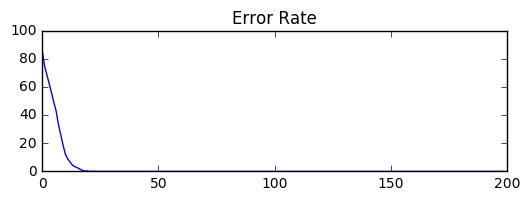

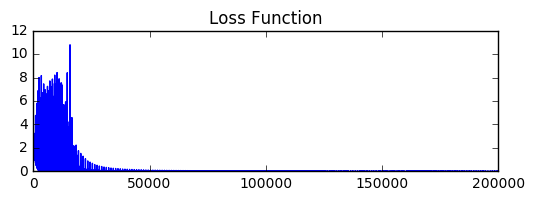

In [212]:
all_error_rate = []
all_lost_values =[]
for j in range(0,200):
    #all_lost_values =[]
    error_rate = 0
    for i in range(1000):
        input_values =  training_data[i]
        input_values =np.append(input_values, 1)
        input_values = input_values.reshape(1,3073)
        training_l = np.zeros([10,1])
        temp = training_labels[i]
        training_l[temp] =1
        #configure 
        #Experiemnt(200, T.nnet.sigmoid)
        output, dw, loss_value = final_output_task1(input_values.T,training_l)
        error_rate = error_rate + np.clip(abs(np.argmax(output) - np.argmax(training_l)), 0, 1)
        #T.nnet.relu(np.argmax(output) - np.argmax(training_l))
        #error_rate.append(currt_error_rate);
        all_lost_values.append(loss_value);
    all_error_rate.append(error_rate/10)
plt.subplot(211)
#plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title("Error Rate")
plt.plot(all_error_rate)
plt.show()
#print all_lost_values
plt.subplot(211)
#plt.xlim(0, 100000)
#plt.ylim(0, 8)
plt.title("Loss Function")
plt.plot(all_lost_values)
plt.show()

68
[[5 0 0 0 1 0 1 1 1 1]
 [0 5 1 0 0 0 2 0 1 1]
 [0 0 2 0 3 2 1 0 2 0]
 [0 0 2 2 1 0 4 0 0 1]
 [2 0 0 2 4 0 0 1 0 1]
 [1 1 0 1 1 4 0 2 0 0]
 [0 0 0 2 5 0 2 1 0 0]
 [1 0 2 2 3 0 0 0 0 2]
 [2 2 0 0 0 0 0 0 5 1]
 [0 2 0 1 1 0 0 0 3 3]]


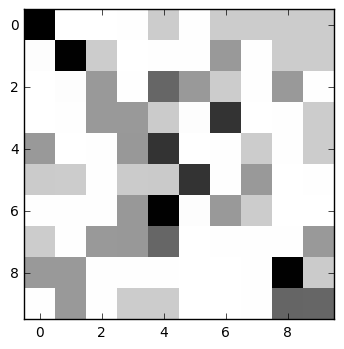

In [215]:
from sklearn.metrics import confusion_matrix
error_rate =0
predict_mat = []
truth_predict = []
#print W.get_value();
for i in range(100):
    input_values =  test_data.T[i]
    input_values =np.append(input_values, 1)
    input_values = input_values.reshape(1,3073)
    testing_l = np.zeros([10,1])
    temp = test_labels[i]
    testing_l[temp] =1
    #print training_l
    truth_predict.append(int(temp))
    #print input_values.shape
    output = test_model_task1(input_values.T)
    predict_mat.append(np.argmax(output))
    if (np.argmax(output) != np.argmax(testing_l)):
        error_rate +=1 
    #print np.argmax(output),np.argmax(testing_l)
conf= confusion_matrix(truth_predict,predict_mat)
print error_rate
print conf
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

# Task 2:
Change the activation functions for all the nodes in task 1 to sigmoid and repeat the process.

In [41]:

alpha = 0.003
min_initial_weights = -1e-3
max_initial_weights = 1e-3

W = theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (100, 3072+1) ), name='W' ) # 1 output, 2 inputs
# Define some placeholders for our inputs/targets

input_m = T.dmatrix('input')
t = T.dmatrix('target')
temp1 = T.dot(W, input_m)

# changing activation function to sigmoid
net_output = T.nnet.sigmoid(temp1)

W2 =  theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (10, 100) ), name='W2')

b = theano.shared(np.random.uniform(1.0, 1.0, (10, 1) ), name='bias' ) 

temp2 = T.dot(W2,net_output)+b

net = T.nnet.softmax(temp2.T)


loss_function = T.nnet.categorical_crossentropy(net,t.T)

loss_value = loss_function.mean()

dw, dw2, db = T.grad(cost=loss_value, wrt=[W,W2,b])


final_output_task2= theano.function([input_m,t], [net,dw, loss_value] , #,on_unused_input='ignore')
                               updates=[[W, W - alpha*dw], 
                                 [W2, W2 - alpha*dw2],
                                  [b, b - alpha*db]],on_unused_input='ignore')


test_model_task2 = theano.function(inputs=[input_m], outputs=net)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Warning, Cannot compute test value: input 0 (dot.0) of Op sigmoid(dot.0) missing default value


C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


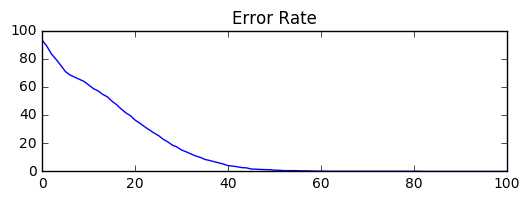

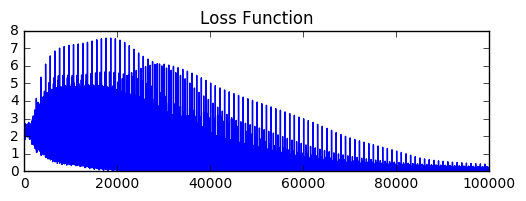

In [42]:
all_error_rate = []
all_lost_values =[]
for j in range(0,200):
    #all_lost_values =[]
    error_rate = 0
    for i in range(1000):
        input_values =  training_data[i]
        input_values =np.append(input_values, 1)
        input_values = input_values.reshape(1,3073)
        training_l = np.zeros([10,1])
        temp = training_labels[i]
        training_l[temp] =1
        #configure 
        #Experiemnt(200, T.nnet.sigmoid)
        output, dw, loss_value = final_output_task2(input_values.T,training_l)
        error_rate = error_rate + np.clip(abs(np.argmax(output) - np.argmax(training_l)), 0, 1)
        #T.nnet.relu(np.argmax(output) - np.argmax(training_l))
        #error_rate.append(currt_error_rate);
        all_lost_values.append(loss_value);
    all_error_rate.append(error_rate/10)
plt.subplot(211)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title("Error Rate")
plt.plot(all_error_rate)
plt.show()
#print all_lost_values
plt.subplot(211)
plt.xlim(0, 100000)
plt.ylim(0, 8)
plt.title("Loss Function")
plt.plot(all_lost_values)
plt.show()

71
[[5 0 2 0 0 0 1 0 1 1]
 [2 4 0 1 0 0 2 0 0 1]
 [2 0 1 0 2 2 1 0 2 0]
 [0 0 2 2 1 0 4 0 1 0]
 [2 1 1 1 2 1 2 0 0 0]
 [0 2 0 0 1 3 0 4 0 0]
 [0 1 1 1 5 0 1 1 0 0]
 [1 0 2 0 2 1 0 1 2 1]
 [2 1 0 0 0 0 0 0 6 1]
 [2 1 0 1 1 0 0 1 0 4]]


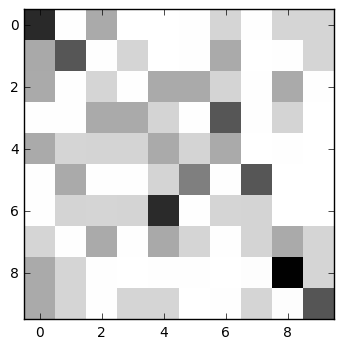

In [43]:
from sklearn.metrics import confusion_matrix
error_rate =0
predict_mat = []
truth_predict = []
#print W.get_value();
for i in range(100):
    input_values =  test_data.T[i]
    input_values =np.append(input_values, 1)
    input_values = input_values.reshape(1,3073)
    testing_l = np.zeros([10,1])
    temp = test_labels[i]
    testing_l[temp] =1
    #print training_l
    truth_predict.append(int(temp))
    #print input_values.shape
    output = test_model_task2(input_values.T)
    predict_mat.append(np.argmax(output))
    if (np.argmax(output) != np.argmax(testing_l)):
        error_rate +=1 
    #print np.argmax(output),np.argmax(testing_l)
conf= confusion_matrix(truth_predict,predict_mat)
print error_rate
print conf
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

# Task 3 :
Change the number of nodes in the hidden layer in the neural network that you implemented in task 1 to 100, 200, 300, 400 , 500 and plot the error rate for each case vs the number of hidden nodes. 

# 
Changing node to 200


In [31]:

alpha = 0.003
min_initial_weights = -1e-3
max_initial_weights = 1e-3

number_of_nodes = theano.shared(value=200);

W = theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (number_of_nodes.eval(), 3072+1) ), name='W' ) # 1 output, 2 inputs
# Define some placeholders for our inputs/targets

input_m = T.dmatrix('input')
t = T.dmatrix('target')
temp1 = T.dot(W, input_m)

# changing activation function to relu
net_output = T.nnet.relu(temp1)

W2 =  theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (10, number_of_nodes.eval()) ), name='W2')

b = theano.shared(np.random.uniform(1.0, 1.0, (10, 1) ), name='bias' ) 

temp2 = T.dot(W2,net_output)+b

net = T.nnet.softmax(temp2.T)


loss_function = T.nnet.categorical_crossentropy(net,t.T)

loss_value = loss_function.mean()

dw, dw2, db = T.grad(cost=loss_value, wrt=[W,W2,b])


final_output_task3= theano.function([input_m,t], [net,dw, loss_value] , #,on_unused_input='ignore')
                               updates=[[W, W - alpha*dw], 
                                 [W2, W2 - alpha*dw2],
                                  [b, b - alpha*db]],on_unused_input='ignore')


test_model_task3 = theano.function(inputs=[input_m], outputs=net)

In [32]:
def task3(number_nodes):
    all_error_rate = []
    all_lost_values =[]
    for j in range(0,25):
        #all_lost_values =[]
        error_rate = 0
        for i in range(1000):
            input_values =  training_data[i]
            input_values =np.append(input_values, 1)
            input_values = input_values.reshape(1,3073)
            training_l = np.zeros([10,1])
            temp = training_labels[i]
            training_l[temp] =1
            #configure 
            #Experiemnt(200, T.nnet.sigmoid)
            number_of_nodes.set_value(number_nodes)
            output, dw, loss_value = final_output_task3(input_values.T,training_l)
            error_rate = error_rate + np.clip(abs(np.argmax(output) - np.argmax(training_l)), 0, 1)
            #T.nnet.relu(np.argmax(output) - np.argmax(training_l))
            #error_rate.append(currt_error_rate);
            all_lost_values.append(loss_value);
        all_error_rate.append(error_rate/10)
    plt.subplot(211)
    #plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.title("Error Rate")
    plt.plot(all_error_rate)
    plt.show()
    #print all_lost_values
    plt.subplot(211)
    #plt.xlim(0, 100000)
    plt.ylim(0, 8)
    plt.title("Loss Function")
    plt.plot(all_lost_values)
    plt.show()

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


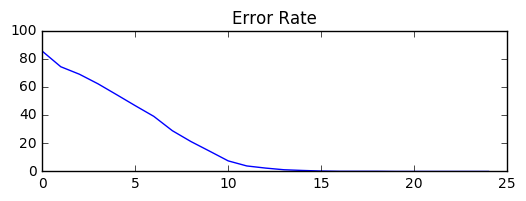

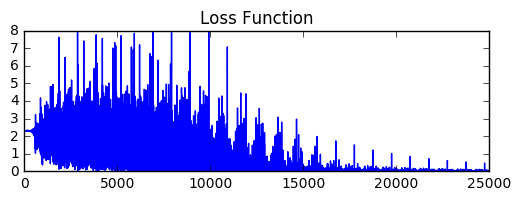

In [33]:
#run above 2 celll theano function to reinitalize the weight of theano function
task3(200)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


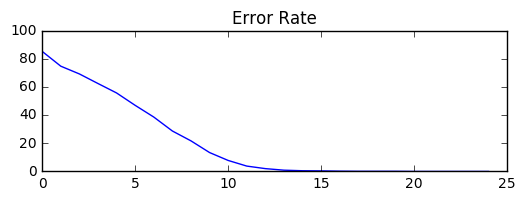

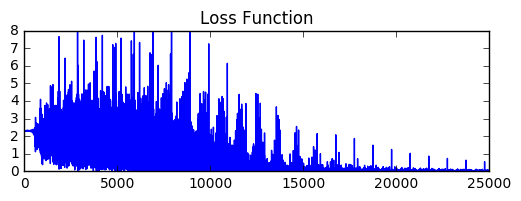

In [24]:
task3(300)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


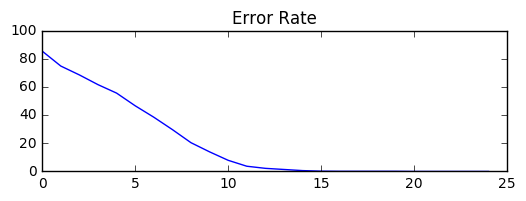

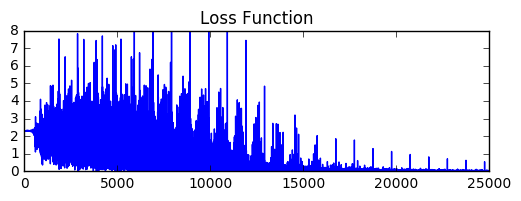

In [27]:
task3(400)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


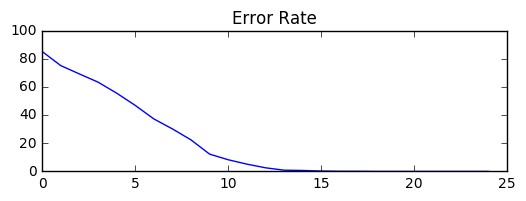

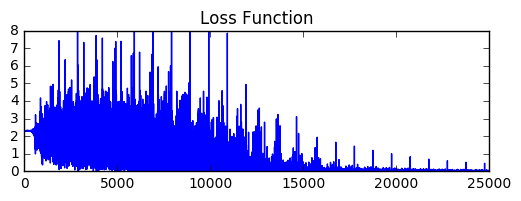

In [30]:
task3(500)

# Task 4
Set the number of nodes in the hidden layer to 500 and repeat the experiment in task 1 and apply weight regularization. Use the lambda for the weight regularization to be 0.1, 0.2, 0.3, 0.4 0.5. Train the neural network with the training data with each lambda. Calculate and show the confusion matrix for each lambda using the test set

In [35]:
#def Experiment():
alpha = 0.003
min_initial_weights = -1e-3
max_initial_weights = 1e-3

number_of_nodes = theano.shared(value=200);

lamda_v = theano.shared(value = 0.01)

W = theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (number_of_nodes.eval(), 3072+1) ), name='W' ) # 1 output, 2 inputs
# Define some placeholders for our inputs/targets

input_m = T.dmatrix('input')
t = T.dmatrix('target')
temp1 = T.dot(W, input_m)

# changing activation function to relu
net_output = T.nnet.relu(temp1)

W2 =  theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (10, number_of_nodes.eval()) ), name='W2')

b = theano.shared(np.random.uniform(1.0, 1.0, (10, 1) ), name='bias' ) 

temp2 = T.dot(W2,net_output)+b

net = T.nnet.softmax(temp2.T)

#L1_W  = T.sum(abs((W).sum())  + abs((W2).sum()))

#L1_W2  = T.sum(W2)

#L1 = L1_W + L1_W2
# symbolic Theano variable that represents the squared L2 term
L2_W = T.sum((W ** 2).sum() + (W2 ** 2).sum())

loss_function = T.nnet.categorical_crossentropy(net,t.T)

loss_value = loss_function.mean()

final_cost_value = loss_value + (lamda_v * L2_W) #+ lamda.eval() * L2_W

dw, dw2, db = T.grad(cost=final_cost_value , wrt=[W,W2,b])


final_output_task4= theano.function([input_m,t], [net,dw, loss_value] , #,on_unused_input='ignore')
                               updates=[[W, W - alpha*dw], 
                                 [W2, W2 - alpha*dw2],
                                  [b, b - alpha*db]],on_unused_input='ignore')


test_model_task4 = theano.function(inputs=[input_m], outputs=net)

In [36]:
def task4(lamba_value):
    #Experiment4()
    all_error_rate = []
    all_lost_values =[]
    for j in range(0,25):
        #all_lost_values =[]
        error_rate = 0
        for i in range(1000):
            input_values =  training_data[i]
            number_of_nodes.set_value(500)
            lamda_v.set_value(lamba_value)
            #print number_of_nodes.get_value()
            input_values =np.append(input_values, 1)
            input_values = input_values.reshape(1,3073)
            training_l = np.zeros([10,1])
            temp = training_labels[i]
            training_l[temp] =1
            #configure 
            #Experiemnt(200, T.nnet.sigmoid)
            output, dw, loss_value = final_output_task4(input_values.T,training_l)
            error_rate = error_rate + np.clip(abs(np.argmax(output) - np.argmax(training_l)), 0, 1)
            #T.nnet.relu(np.argmax(output) - np.argmax(training_l))
            #error_rate.append(currt_error_rate);
            all_lost_values.append(loss_value);
        all_error_rate.append(error_rate/10)
    #print all_error_rate
    plt.subplot(211)
    #plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.title("Error Rate")
    plt.plot(all_error_rate)
    plt.show()
    #print all_lost_values
    plt.subplot(211)
    #plt.xlim(0, 100000)
    plt.ylim(0, 8)
    plt.title("Loss Function")
    plt.plot(all_lost_values)
    plt.show()
    from sklearn.metrics import confusion_matrix
    error_rate =0
    predict_mat = []
    truth_predict = []
#print W.get_value();
    for i in range(100):
        input_values =  test_data.T[i]
        input_values =np.append(input_values, 1)
        input_values = input_values.reshape(1,3073)
        testing_l = np.zeros([10,1])
        temp = test_labels[i]
        testing_l[temp] =1
        #print training_l
        truth_predict.append(int(temp))
        #print input_values.shape
        output = test_model_task4(input_values.T)
        predict_mat.append(np.argmax(output))
        if (np.argmax(output) != np.argmax(testing_l)):
            error_rate +=1 
        #print np.argmax(output),np.argmax(testing_l)
    conf= confusion_matrix(truth_predict,predict_mat)
    print error_rate
    print conf
    plt.imshow(conf, cmap='binary', interpolation='None')
    plt.show()

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


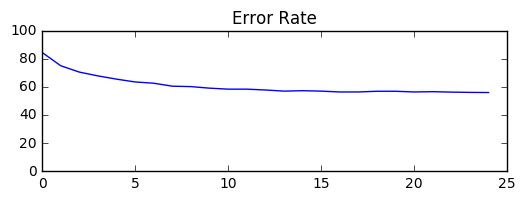

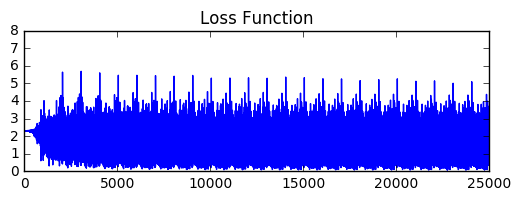

74
[[2 0 0 0 0 0 1 1 4 2]
 [0 3 1 0 1 1 0 0 0 4]
 [0 1 2 0 4 0 0 1 2 0]
 [0 0 4 0 2 1 2 0 0 1]
 [1 0 2 1 3 0 0 1 0 2]
 [0 2 1 0 2 3 0 2 0 0]
 [0 0 0 1 7 0 1 1 0 0]
 [0 1 1 0 3 0 0 2 2 1]
 [0 1 0 0 0 0 0 0 4 5]
 [0 2 0 0 0 1 0 0 1 6]]


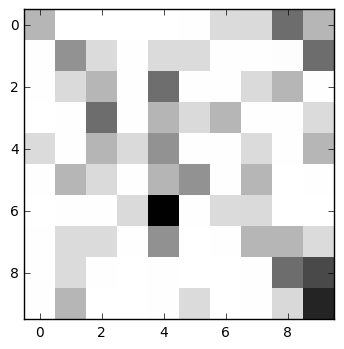

In [24]:
task4(0.1)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


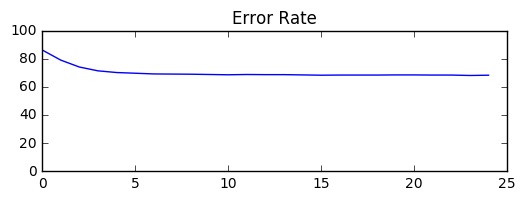

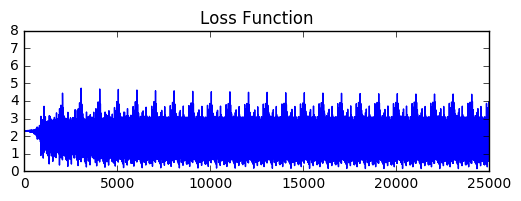

73
[[3 0 0 0 1 0 0 0 4 2]
 [0 4 0 0 1 1 0 0 0 4]
 [1 1 2 0 4 0 0 1 1 0]
 [0 0 2 0 5 2 0 0 0 1]
 [0 0 1 0 5 0 0 1 1 2]
 [0 1 2 0 3 1 0 3 0 0]
 [0 0 1 0 9 0 0 0 0 0]
 [1 1 1 0 4 0 0 1 1 1]
 [0 2 0 0 0 0 0 0 4 4]
 [0 1 0 0 1 1 0 0 0 7]]


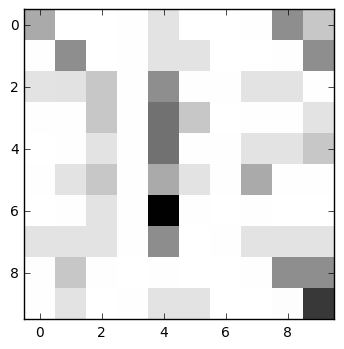

In [26]:
task4(0.2)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


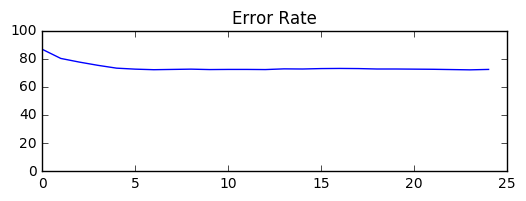

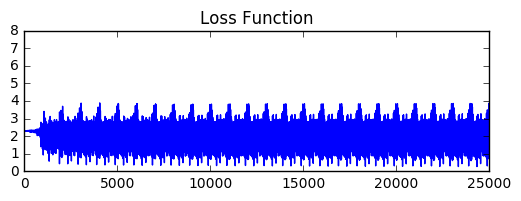

74
[[4 0 0 0 1 0 0 0 3 2]
 [0 2 0 0 3 1 0 0 0 4]
 [2 0 2 0 4 0 0 0 1 1]
 [1 0 0 0 7 1 0 0 0 1]
 [0 0 2 0 5 0 0 0 2 1]
 [0 0 4 0 3 0 0 2 0 1]
 [0 0 1 0 9 0 0 0 0 0]
 [1 1 1 0 4 0 0 1 1 1]
 [1 1 0 0 0 0 0 0 5 3]
 [0 1 0 0 1 1 0 0 0 7]]


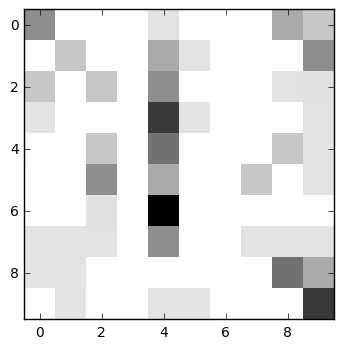

In [28]:
task4(0.3)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


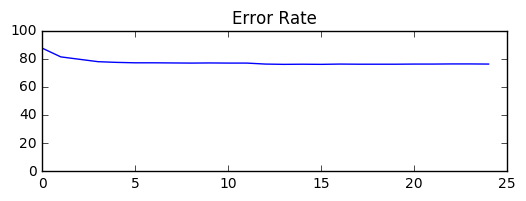

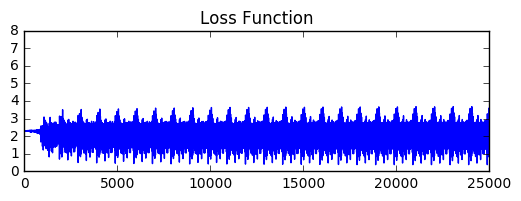

78
[[4 0 0 0 1 0 0 0 3 2]
 [0 0 1 0 4 0 0 0 2 3]
 [2 0 3 0 3 0 0 0 1 1]
 [1 0 1 0 7 0 0 0 0 1]
 [1 0 2 0 4 0 0 1 1 1]
 [0 0 4 0 3 0 0 2 0 1]
 [0 0 1 0 9 0 0 0 0 0]
 [1 0 2 0 4 0 0 1 1 1]
 [0 1 1 0 0 0 0 0 5 3]
 [0 1 0 0 2 0 0 1 1 5]]


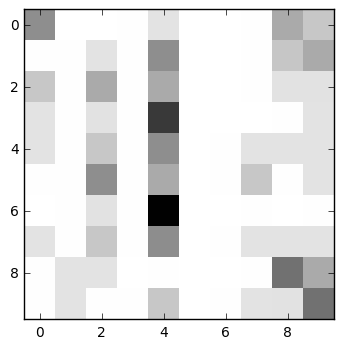

In [30]:
task4(0.4)

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


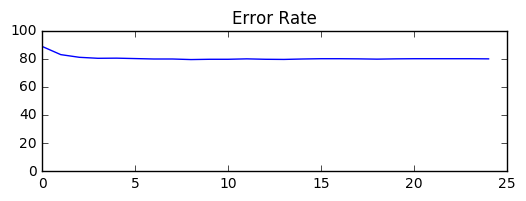

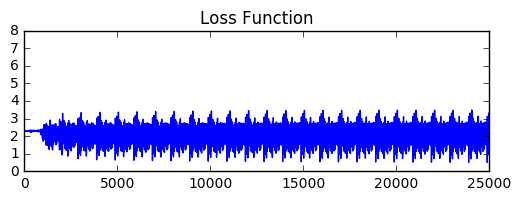

83
[[4 0 0 0 1 0 0 0 3 2]
 [0 0 0 0 5 0 0 0 3 2]
 [2 0 0 0 5 0 1 0 1 1]
 [1 0 0 0 8 0 0 0 0 1]
 [2 0 2 0 5 0 0 0 0 1]
 [0 0 4 0 4 0 1 0 0 1]
 [0 0 1 0 9 0 0 0 0 0]
 [1 0 2 0 4 0 1 0 1 1]
 [1 0 1 0 0 0 0 0 3 5]
 [0 0 0 0 2 0 0 2 1 5]]


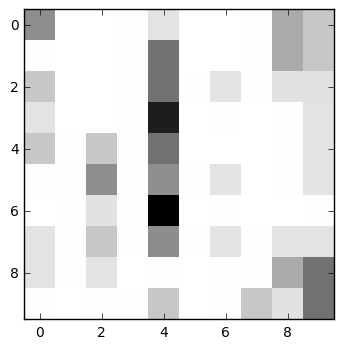

In [34]:
task4(0.5)

# Task 5
Best Architecture : lamda : 0.3 or 0.2
and number of nodes : 400 or 500

In [37]:
print training_data.shape
print test_data.shape

(10000L, 3072L)
(3072L, 1000L)


In [63]:
#def Experiment():
alpha = 0.003
min_initial_weights = -1e-3
max_initial_weights = 1e-3

number_of_nodes = theano.shared(value=200);

lamda_v = theano.shared(value = 0.1)


W = theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (number_of_nodes.eval(), 3072+1) ), name='W' ) # 1 output, 2 inputs
# Define some placeholders for our inputs/targets

input_m = T.dmatrix('input')
t = T.dmatrix('target')
temp1 = T.dot(W, input_m)

# changing activation function to relu
net_output = T.nnet.relu(temp1)


W2 =  theano.shared(np.random.uniform(min_initial_weights, max_initial_weights,
                                                 (10, number_of_nodes.eval()) ), name='W2')

b = theano.shared(np.random.uniform(1.0, 1.0, (10, 1) ), name='bias' ) 

temp2 = T.dot(W2,net_output)+b

net = T.nnet.softmax(temp2.T)

#L1_W  = T.sum(abs((W).sum())  + abs((W2).sum()))


L2_W = T.sum((W ** 2).sum() + (W2 ** 2).sum())

loss_function = T.nnet.categorical_crossentropy(net,t.T)

loss_value = loss_function.mean()

final_cost_value = loss_value + (lamda_v.eval() * L2_W)

dw, dw2, db = T.grad(cost=final_cost_value , wrt=[W,W2,b])


final_output_task5= theano.function([input_m,t], [net,dw, loss_value] , #,on_unused_input='ignore')
                               updates=[[W, W - alpha*dw], 
                                 [W2, W2 - alpha*dw2],
                                  [b, b - alpha*db]],on_unused_input='ignore')


test_model_task5 = theano.function(inputs=[input_m], outputs=net)

In [65]:
def task5(lamba_value, number_of_n):
    #Experiment4()
    all_error_rate = []
    all_lost_values =[]
    for j in range(0,25):
        #all_lost_values =[]
        error_rate = 0
        for i in range(training_data.shape[0]):
            input_values =  training_data[i]
            number_of_nodes.set_value(number_of_n)
            lamda_v.set_value(lamba_value)
            #print number_of_nodes.get_value()
            input_values =np.append(input_values, 1)
            input_values = input_values.reshape(1,3073)
            training_l = np.zeros([10,1])
            temp = training_labels[i]
            training_l[temp] =1
            #configure 
            #Experiemnt(200, T.nnet.sigmoid)
            output, dw, loss_value = final_output_task5(input_values.T,training_l)
            error_rate = error_rate + np.clip(abs(np.argmax(output) - np.argmax(training_l)), 0, 1)
            #T.nnet.relu(np.argmax(output) - np.argmax(training_l))
            #error_rate.append(currt_error_rate);
            all_lost_values.append(loss_value);
        #print error_rate/10
        all_error_rate.append(error_rate/100)
    #print all_error_rate
    plt.subplot(211)
    #plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.title("Error Rate")
    plt.plot(all_error_rate)
    plt.show()
    #print all_lost_values
    plt.subplot(211)
    #plt.xlim(0, 100000)
    #plt.ylim(0, 8)
    plt.title("Loss Function")
    plt.plot(all_lost_values)
    plt.show()
    from sklearn.metrics import confusion_matrix
    error_rate =0
    predict_mat = []
    truth_predict = []
#print W.get_value();
    for i in range(test_data.shape[1]):
        input_values =  test_data.T[i]
        input_values =np.append(input_values, 1)
        input_values = input_values.reshape(1,3073)
        testing_l = np.zeros([10,1])
        temp = test_labels[i]
        testing_l[temp] =1
        #print training_l
        truth_predict.append(int(temp))
        #print input_values.shape
        output = test_model_task5(input_values.T)
        predict_mat.append(np.argmax(output))
        if (np.argmax(output) != np.argmax(testing_l)):
            error_rate +=1 
        #print np.argmax(output),np.argmax(testing_l)
    conf= confusion_matrix(truth_predict,predict_mat)
    print error_rate
    print conf
    plt.imshow(conf, cmap='binary', interpolation='None')
    plt.show()

C:\Users\cheta\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


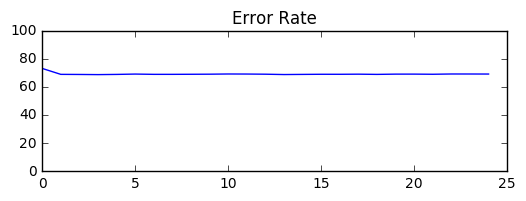

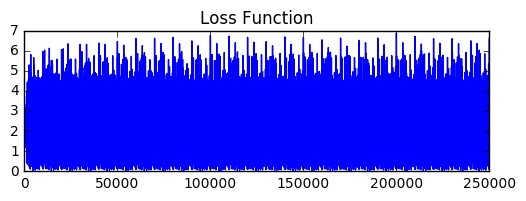

675
[[42  1  2  1  4  1  7 15 18  9]
 [ 3 21  1  0  7  4 21  5 17 21]
 [23  0  5  1 27  7 21 12  1  3]
 [ 4  0  1  1 10 16 47 10  2  9]
 [ 6  2  7  1 38  6 19 13  4  4]
 [ 3  1  6  2 13 27 37  6  3  2]
 [ 1  1  2  1 24  4 57  6  1  3]
 [ 4  3  5  0 16  4 23 37  1  7]
 [17  2  0  0  2 11  1  1 55 11]
 [ 5  6  1  1  3  1  8  4 29 42]]


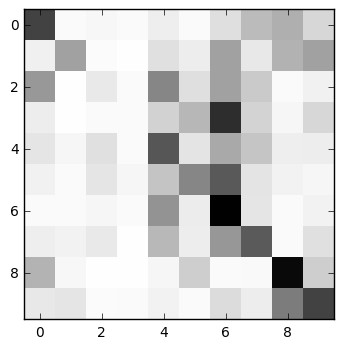

In [66]:
task5(0.3, 400)

In [ ]:

# coding: utf-8

# In[ ]:

# Shimpi, Rohan Pankaj
# 1001-148-445
# 2016-10-01
# Assignment_03

import numpy as np
import scipy.misc
import os
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import gc
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

def read_one_image_and_convert_to_vector(file_name):
    #print file_name
    img = scipy.misc.imread(file_name).astype(np.float32) # read image and convert to float
    #print img.reshape(-1,1)
    return img.reshape(-1,1) # reshape to column vector and return it

def read_files(path):
    data = np.empty((3072,0))
    targets = np.empty((10,0))

    for filename in os.listdir(os.getcwd()+"/"+path):
        t = filename.split("_")[0]
        temp = [0]*10
        temp[int(t)] = 1
        file_path = os.path.join(os.getcwd(),path,filename)
        data = np.hstack([data,read_one_image_and_convert_to_vector(file_path)])
        targets = np.hstack([targets,np.array(temp).reshape(-1,1)])

    #targets.append(temp)
    input,t = shuffle(data.T,targets.T,random_state=0)
    data = input.T
    targets = t.T
    #print data
    return np.array(data),np.array(targets)

def get_input_data(path):
    input_vectors, target_vectors = read_files(path)
    mean = np.mean(input_vectors,axis=1)
    std = np.std(input_vectors, axis=1)
    input_vectors = np.subtract(input_vectors.T,mean)
    input_vectors = input_vectors/std
    return input_vectors, target_vectors


learning_rate = theano.shared(0.003, name="learning_rate")
hidden_nodes = theano.shared(value=400,name="hidden_nodes")
regularization = theano.shared(value=0.2,name="regularization")

hidden_weights = theano.shared(value=np.random.uniform(-1e-3, 1e-3,
                                     (hidden_nodes.eval(), 3072)),name="hidden_weights")
hidden_bias = theano.shared(value=np.random.uniform(-1e-3, 1e-3,
                                     (hidden_nodes.eval(), 1)),name="hidden_bias")
input_image = T.dmatrix("input_image")
target_output = T.dmatrix("target_output")
final_weights = theano.shared(value=np.random.uniform(-1e-3, 1e-3,
                                     (10, hidden_nodes.eval())),name="final_weights")
final_bias = theano.shared(value=np.random.uniform(-1e-3, 1e-3,
                                     (10, 1)),name="final_bias")
h_net = T.dot(hidden_weights,input_image) + hidden_bias

hidden_output = T.nnet.relu(h_net)
temp = T.dot(final_weights,hidden_output) + final_bias
final_output = T.nnet.softmax(temp.T)

loss_output = T.nnet.categorical_crossentropy(final_output,target_output.T)
#r1 = (regularization*hidden_weights**2)/(2*1000)
#r2 = (regularization*final_weights**2)/(2*1000)
temp = ((hidden_weights ** 2).sum() + (final_weights ** 2).sum())*regularization
hidden_gradient, final_gradient, hidden_bias_gradient, final_bias_gradient = T.grad(cost=loss_output.mean()+temp,wrt=[hidden_weights,final_weights,hidden_bias,final_bias])

training_network = theano.function([input_image,target_output],[final_output,loss_output,hidden_gradient,final_gradient,temp],
                                  updates=[[hidden_weights,hidden_weights-(learning_rate*hidden_gradient)],
                                           [final_weights, final_weights - (learning_rate*final_gradient)],
                                           [hidden_bias, hidden_bias-(learning_rate*hidden_bias_gradient)],
                                           [final_bias, final_bias-(learning_rate*final_bias_gradient)]],
                                   on_unused_input="ignore")

test_network = theano.function([input_image],final_output)


# In[ ]:



#print input.shape
def run_network(number_nodes,reg):
    #gc.collect()
    input_data, target_classes = get_input_data("cifar_data_1000_100/train")
    loss_array = []
    error_list = []
    hidden_nodes.set_value(number_nodes)
    regularization.set_value(reg)
    error_epoch = []
    loss_epoch  = []
    epoch = 30
    print input_data.shape[0]
    for epoch in range(epoch):
        #print "epoch", epoch
        error = 0
        for i in range(input_data.shape[0]):
            input = input_data[i]
            input = input.reshape(3072,1)
            target_output = target_classes.T[i]
            target_output = target_output.reshape(10,1)
            output = training_network(input,target_output)
            #print output[4]
            loss_array.append(output[1])
            if(np.argmax(target_output)!=np.argmax(output[0])):
                error=error+1
        error_list.append(error/input_data.shape[0])
        print str(epoch)+ "  error  "+ str(error/10.0)

        loss_epoch.append(loss_array)
    '''for i in range(len(loss_epoch)):
        plt.xlim(0,1000)
        plt.ylim(0,20)
        plt.title("Loss")
        plt.plot(loss_epoch[i])
        plt.show()'''

    merg_loss = loss_epoch[0]
    for i in xrange(1,len(loss_epoch)):
        merg_loss=merg_loss+loss_epoch[i];

    plt.xlim(0, input_data.shape[0]*epoch)
    plt.ylim(0, 30)
    plt.title(str(epoch)+"_"+str(number_nodes)+"_"+str(reg)+"_"+"Loss")
    plt.plot(merg_loss)
    plt.savefig(str(epoch)+"_"+str(number_nodes)+"_"+str(reg)+"_"+'_loss_functionr_new.png')
    plt.show()

    plt.xlim(0, epoch)
    plt.ylim(0, 100)
    plt.title(str(epoch)+"_"+str(number_nodes)+"_"+str(reg)+"_"+"Error")
    plt.plot(error_list)
    plt.savefig(str(epoch)+"_"+str(number_nodes)+"_"+str(reg)+"_"+"_error_new.png")
    plt.show()
    # In[ ]:

    test_input,test_target = get_input_data("cifar_data_1000_100/test")

    test_error =0
    ground_truth = []
    prediction_class = []
    for i in range(test_input.shape[0]):
        input = test_input[i]
        input = input.reshape(3072, 1)
        target_output = test_target.T[i]
        target_output = target_output.reshape(10, 1)
        output = test_network(input)
        if (np.argmax(target_output) != np.argmax(output)):
            test_error = test_error + 1
        prediction_class.append(np.argmax(output))
        ground_truth.append(np.argmax(target_output))
    test_error/test_input.shape[0]
    print test_error

    plot_confusion = confusion_matrix(ground_truth,prediction_class)
    print plot_confusion
    plt.title(str(epoch)+"_"+str(number_nodes)+"_"+str(reg)+"_"+"_confusion")
    plt.matshow(plot_confusion, cmap=plt.cm.gray)
    plt.savefig(str(epoch)+"_"+str(number_nodes)+"_"+str(reg)+"_"+"_confusion_new.png")
    plt.show()

# In[ ]:
if __name__ == "__main__":
    run_network(400,0.2)

    '''nodes = [100,200,300,400,500]
    lamb = [0.1,0.2,0.3,0.4,0.5]
    for n in nodes:

        hidden_weights.set_value(np.random.uniform(-1e-3, 1e-3,(n, 3072)))
        hidden_bias.set_value(np.random.uniform(-1e-3, 1e-3,(n, 1)))
        final_weights.set_value(np.random.uniform(-1e-3, 1e-3,(10, n)))
        final_bias.set_value(np.random.uniform(-1e-3, 1e-3,(10, 1)))
        for l in lamb:
            print "..... "
            print "..... "
            print "for setting nodes "+ str(n)+" and lambda "+str(l)
            run_network(n,l)'''
